In [134]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [135]:
import csv

In [136]:
db_gain = pd.read_csv(r'C:\Users\sk2947\Documents\GitHub\Aging\RiskandAmbiguity\RAID\Gains_f.csv')

In [137]:
db_loss = pd.read_csv(r'C:\Users\sk2947\Documents\GitHub\Aging\RiskandAmbiguity\RAID\Loss_f.csv')

In [138]:
print(db_gain.shape)
db_gain = db_gain[db_gain['sub'] == 31]
print(db_gain.shape)

(2728, 7)
(124, 7)


In [139]:
print(db_loss.shape)
db_gain = db_loss[db_loss['sub'] == 31]
print(db_loss.shape)

(2852, 7)
(2852, 7)


In [140]:
db_gain.head()

,Unnamed: 0,choice,value,risk,ambiguity,sub,catch
2480,0,1.0,4,0.50,0.00,31,10
2481,1,1.0,10,0.50,0.74,31,10
2482,2,0.0,23,0.25,0.00,31,10
2483,3,0.0,52,0.25,0.00,31,10
2484,4,0.0,73,0.50,0.00,31,10


In [141]:
db_loss.head()

,Unnamed: 0,choice,value,risk,ambiguity,sub,catch
0,0,1.0,4,0.50,0.0,10,10
1,1,1.0,7,0.50,0.5,10,10
2,2,0.0,44,0.50,0.0,10,10
3,3,1.0,7,0.25,0.0,10,10
4,4,0.0,61,0.75,0.0,10,10


In [142]:
choices = db_gain[['sub','choice']].groupby(['sub']).sum()
too_risk_averse = list(choices[choices['choice']<10].index)

db_gain = db_gain[~db_gain['sub'].isin(too_risk_averse)]
too_risk_averse

[]

In [143]:
choices = db_loss[['sub','choice']].groupby(['sub']).sum()
too_risk_averse = list(choices[choices['choice']<10].index)

db_loss = db_loss[~db_loss['sub'].isin(too_risk_averse)]
too_risk_averse

[]

In [144]:
gain_s = list(db_gain['sub'].unique())
loss_s = list(db_loss['sub'].unique())

db_gain = db_gain[db_gain['sub'].isin(loss_s)]
db_loss = db_loss[db_loss['sub'].isin(gain_s)]

#age = age[age['sub'].isin(list(db_loss['sub'].unique()))]

#list(np.setdiff1d(db_loss['sub'].unique(),db_gain['sub'].unique()))

print('total subject in analysis n = ', len(db_loss['sub'].unique()))

total subject in analysis n =  1


In [145]:
gain_risk = db_gain[db_gain['ambiguity'] == 0][['sub','value','choice']]
gain_amb  = db_gain[db_gain['ambiguity'] >  0][['sub','value','choice']]

loss_risk = db_loss[db_loss['ambiguity'] == 0][['sub','value','choice']]
loss_amb  = db_loss[db_loss['ambiguity'] >  0][['sub','value','choice']]

In [146]:
gain_risk_unc = db_gain[db_gain['ambiguity'] == 0][['sub','risk','choice']]
gain_amb_unc  = db_gain[db_gain['ambiguity'] >  0][['sub','ambiguity','choice']]

loss_risk_unc = db_loss[db_loss['ambiguity'] == 0][['sub','risk','choice']]
loss_amb_unc  = db_loss[db_loss['ambiguity'] >  0][['sub','ambiguity','choice']]

In [147]:
unc_cont_gain = db_gain[(db_gain['ambiguity'] == 0) & (db_gain['risk'] == 0.5)][['sub','value','choice']]
unc_cont_gain = unc_cont_gain.groupby(['sub','value']).mean()
unc_cont_gain.reset_index(inplace=True)

unc_cont_loss = db_loss[(db_loss['ambiguity'] == 0) & (db_loss['risk'] == 0.5)][['sub','value','choice']]
unc_cont_loss = unc_cont_loss.groupby(['sub','value']).mean()
unc_cont_loss.reset_index(inplace=True)

In [148]:
gain_prop_r = gain_risk.groupby(['sub','value']).mean()
gain_prop_a = gain_amb.groupby(['sub','value']).mean()
loss_prop_r = loss_risk.groupby(['sub','value']).mean()
loss_prop_a = loss_amb.groupby(['sub','value']).mean()

gain_prop_r.reset_index(inplace=True)
gain_prop_a.reset_index(inplace=True)
loss_prop_r.reset_index(inplace=True)
loss_prop_a.reset_index(inplace=True)

In [149]:
gain_prop_a['choice']=gain_prop_a['choice']-unc_cont_gain['choice']
loss_prop_a['choice']=loss_prop_a['choice']-unc_cont_loss['choice']

In [150]:
gain_prop_unc_r = gain_risk_unc.groupby(['sub','risk']).mean()
gain_prop_unc_a = gain_amb_unc.groupby(['sub','ambiguity']).mean()
loss_prop_unc_r = loss_risk_unc.groupby(['sub','risk']).mean()
loss_prop_unc_a = loss_amb_unc.groupby(['sub','ambiguity']).mean()

gain_prop_unc_r.reset_index(inplace=True)
gain_prop_unc_a.reset_index(inplace=True)
loss_prop_unc_r.reset_index(inplace=True)
loss_prop_unc_a.reset_index(inplace=True)

In [151]:
gain_cont = gain_prop_unc_r[gain_prop_unc_r['risk']==0.5][['sub','choice']]
gain_prop_unc_a = pd.merge(gain_prop_unc_a, gain_cont, on='sub')
gain_prop_unc_a['choice'] = gain_prop_unc_a.choice_x-gain_prop_unc_a.choice_y

loss_cont = loss_prop_unc_r[loss_prop_unc_r['risk']==0.5][['sub','choice']]
loss_prop_unc_a = pd.merge(loss_prop_unc_a, loss_cont, on='sub')
loss_prop_unc_a['choice'] = loss_prop_unc_a.choice_x-loss_prop_unc_a.choice_y

In [152]:
#gain_prop_r = gain_prop_r.merge(age, left_on='sub', right_on='sub')
#gain_prop_a = gain_prop_a.merge(age, left_on='sub', right_on='sub')
#loss_prop_r = loss_prop_r.merge(age, left_on='sub', right_on='sub')
#loss_prop_a = loss_prop_a.merge(age, left_on='sub', right_on='sub')

In [153]:
#gain_prop_unc_r = gain_prop_unc_r.merge(age, left_on='sub', right_on='sub')
#gain_prop_unc_a = gain_prop_unc_a.merge(age, left_on='sub', right_on='sub')
#loss_prop_unc_r = loss_prop_unc_r.merge(age, left_on='sub', right_on='sub')
#loss_prop_unc_a = loss_prop_unc_a.merge(age, left_on='sub', right_on='sub')

In [154]:
#norm = matplotlib.colors.Normalize(vmin=gain_prop_r["Age"].min(), vmax=gain_prop_r["Age"].max())
#colors = {}
#cmap = sns.diverging_palette(240, 10, as_cmap=True )

#for cval in gain_prop_r["Age"]:
    #colors.update({cval : cmap(norm(cval))})

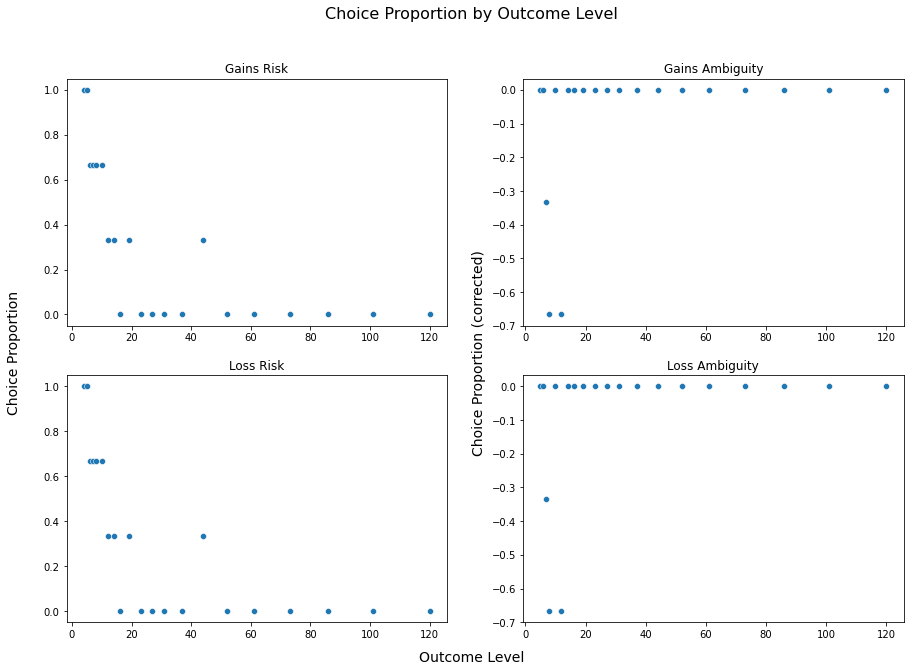

In [155]:
fig = plt.figure(figsize = (15,10))
fig.suptitle('Choice Proportion by Outcome Level', fontsize=16)

fig.text(0.5, 0.07, 'Outcome Level', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'Choice Proportion', va='center', rotation='vertical', fontsize=14)
fig.text(0.5, 0.5, 'Choice Proportion (corrected)', va='center', rotation='vertical', fontsize=14)

ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222) 

#divider = make_axes_locatable(plt.gca())
#ax_cb = divider.new_horizontal(size="5%", pad=0.05)
#fig.add_axes(ax_cb)
#cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, cmap=cmap,
                                #norm=norm,
                                #orientation='vertical')
#cb1.set_label('Age')

ax3 = fig.add_subplot(223)  
ax4 = fig.add_subplot(224)  

sns.scatterplot(x = 'value', y = 'choice', data = gain_prop_r , ax = ax1)
sns.scatterplot(x = 'value', y = 'choice', data = gain_prop_a , ax = ax2)
sns.scatterplot(x = 'value', y = 'choice', data = loss_prop_r , ax = ax3)
sns.scatterplot(x = 'value', y = 'choice', data = loss_prop_a , ax = ax4)

ax1.set(xlabel=None, ylabel=None, title='Gains Risk')
ax2.set(xlabel=None, ylabel=None, title='Gains Ambiguity')
ax3.set(xlabel=None, ylabel=None, title='Loss Risk')
ax4.set(xlabel=None, ylabel=None, title='Loss Ambiguity')

#ax1.legend_.remove()
#ax2.legend_.remove()
#ax3.legend_.remove()
#ax4.legend_.remove()
    
## create colorbar ##
#divider = make_axes_locatable(plt.gca())
#ax_cb = divider.new_horizontal(size="5%", pad=0.05)
#fig.add_axes(ax_cb)
#cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, cmap=cmap,
                                #norm=norm,
                                #orientation='vertical')
#cb1.set_label('Age')
plt.show()

[Text(0.5, 0, ''),
 Text(0, 0.5, ''),
 [Text(0, 0, '24%'), Text(1, 0, '50%'), Text(2, 0, '74%')],
 Text(0.5, 1.0, 'Loss Ambiguity')]

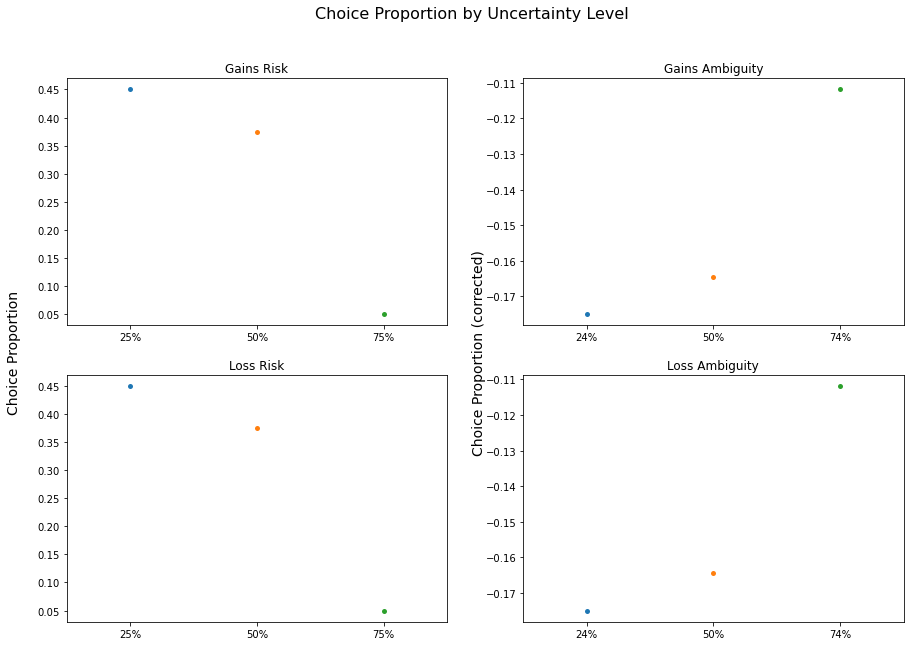

In [156]:
fig = plt.figure(figsize = (15,10))
fig.suptitle('Choice Proportion by Uncertainty Level', fontsize=16)

#fig.text(0.5, 0.07, 'Outcome Level', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'Choice Proportion', va='center', rotation='vertical', fontsize=14)
fig.text(0.5, 0.5, 'Choice Proportion (corrected)', va='center', rotation='vertical', fontsize=14)


ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222)  

#divider = make_axes_locatable(plt.gca())
#ax_cb = divider.new_horizontal(size="5%", pad=0.05)
#fig.add_axes(ax_cb)
#cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, cmap=cmap,
#                                norm=norm,
#                                orientation='vertical')
#cb1.set_label('Age')

ax3 = fig.add_subplot(223)  
ax4 = fig.add_subplot(224)  

sns.swarmplot(x = 'risk', y = 'choice', data = gain_prop_unc_r , ax = ax1)
sns.swarmplot(x = 'ambiguity', y = 'choice', data = gain_prop_unc_a , ax = ax2)
sns.swarmplot(x = 'risk', y = 'choice', data = loss_prop_unc_r , ax = ax3)
sns.swarmplot(x = 'ambiguity', y = 'choice', data = loss_prop_unc_a , ax = ax4)

ax1.set(xlabel=None, ylabel=None, xticklabels=['25%','50%','75%'], title='Gains Risk')
ax2.set(xlabel=None, ylabel=None, xticklabels=['24%','50%','74%'], title='Gains Ambiguity')
ax3.set(xlabel=None, ylabel=None, xticklabels=['25%','50%','75%'], title='Loss Risk')
ax4.set(xlabel=None, ylabel=None, xticklabels=['24%','50%','74%'], title='Loss Ambiguity')

#ax1.legend_.remove()
#ax2.legend_.remove()
#ax3.legend_.remove()
#ax4.legend_.remove()
    
## create colorbar ##
#divider = make_axes_locatable(plt.gca())
#ax_cb = divider.new_horizontal(size="5%", pad=0.05)
#fig.add_axes(ax_cb)
#cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, cmap=cmap,
                                #norm=norm,
                                #orientation='vertical')
#cb1.set_label('Age')
#plt.show()


In [157]:
gain_risk_prop = db_gain[(db_gain.choice == 1) & (db_gain.ambiguity == 0)].groupby('sub').count()['choice']/db_gain[(db_gain.ambiguity == 0)].groupby('sub').count()['choice']
gain_ambg_prop = db_gain[(db_gain.choice == 1) & (db_gain.ambiguity >  0)].groupby('sub').count()['choice']/db_gain[(db_gain.ambiguity >  0)].groupby('sub').count()['choice']

loss_risk_prop = db_loss[(db_loss.choice == 1) & (db_loss.ambiguity == 0)].groupby('sub').count()['choice']/db_loss[(db_loss.ambiguity == 0)].groupby('sub').count()['choice']
loss_ambg_prop = db_loss[(db_loss.choice == 1) & (db_loss.ambiguity >  0)].groupby('sub').count()['choice']/db_loss[(db_loss.ambiguity >  0)].groupby('sub').count()['choice']

In [158]:
gain_ambg_prop=gain_ambg_prop-list(gain_cont['choice'])
loss_ambg_prop=loss_ambg_prop-list(loss_cont['choice'])

In [159]:
prop = pd.DataFrame({'gain_risk' : gain_risk_prop,
                     'gain_ambg' : gain_ambg_prop,
                     'loss_risk' : loss_risk_prop,
                     'loss_ambg' : loss_ambg_prop})
prop = prop.fillna(0)

In [160]:
#prop = prop.merge(age, left_on='sub', right_on='sub')
#prop.head()

In [161]:
prop.head()

,gain_risk,gain_ambg,loss_risk,loss_ambg
sub,,,,
31,0.296875,-0.150862,0.296875,-0.150862


In [162]:
corRisk = sp.stats.pearsonr(prop.gain_risk, prop.loss_risk)
corAmb = sp.stats.pearsonr(prop.gain_ambg, prop.loss_ambg)
corGain = sp.stats.pearsonr(prop.gain_risk, prop.gain_ambg)
corLoss = sp.stats.pearsonr(prop.loss_risk, prop.loss_ambg)

print('corRisk: ', corRisk, 'corAmb ', corAmb, 'corGain ', corGain, 'corLoss ', corLoss)

ValueError: x and y must have length at least 2.

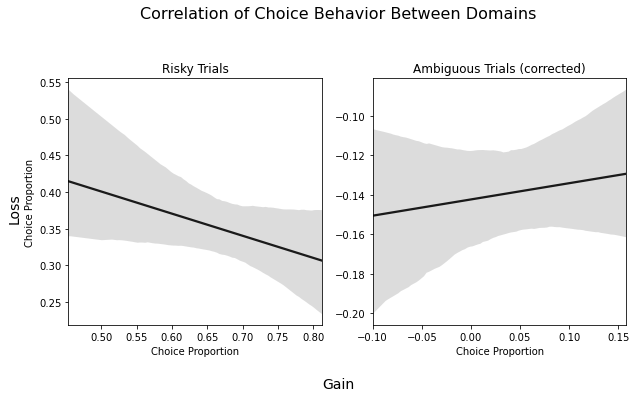

In [132]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('Correlation of Choice Behavior Between Domains', fontsize=16)

fig.text(0.5, 0.45, 'Gain', ha='center', fontsize=14)
fig.text(0.04, 0.7, 'Loss', va='center', rotation='vertical', fontsize=14)

ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222)    

#sns.scatterplot(x='gain_risk',y='gain_risk',data=prop, ax=ax1, #hue = 'Age', palette = colors)
#sns.scatterplot(x='gain_ambg',y='loss_ambg',data=prop, ax=ax2, #hue = 'Age', palette = colors)

sns.regplot(x='gain_risk',y='loss_risk',data=prop, ax=ax1, scatter=False, color=".1")
sns.regplot(x='gain_ambg',y='loss_ambg',data=prop, ax=ax2, scatter=False, color=".1")


ax1.set(xlabel='Choice Proportion', ylabel='Choice Proportion', title='Risky Trials')
ax2.set(xlabel='Choice Proportion', ylabel=None, title='Ambiguous Trials (corrected)')

#ax1.legend_.remove()
#ax2.legend_.remove()

## create colorbar ##
#divider = make_axes_locatable(plt.gca())
#ax_cb = divider.new_horizontal(size="5%", pad=0.05)
#fig.add_axes(ax_cb)
#cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, cmap=cmap,
 #                               norm=norm,
 #                               orientation='vertical')
#cb1.set_label('Age')
plt.show()

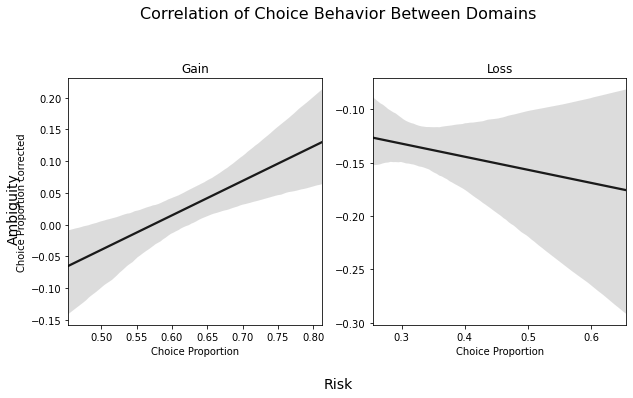

In [54]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('Correlation of Choice Behavior Between Domains', fontsize=16)

fig.text(0.5, 0.45, 'Risk', ha='center', fontsize=14)
fig.text(0.04, 0.7, 'Ambiguity', va='center', rotation='vertical', fontsize=14)

ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222)

#sns.scatterplot(x='gain_risk',y='gain_ambg',data=prop, ax=ax1, #hue = 'Age', palette = colors)
#sns.scatterplot(x='loss_risk',y='loss_ambg',data=prop, ax=ax2, #hue = 'Age', palette = colors)


sns.regplot(x='gain_risk',y='gain_ambg',data=prop, ax=ax1, scatter=False, color=".1")
sns.regplot(x='loss_risk',y='loss_ambg',data=prop, ax=ax2, scatter=False, color=".1")


ax1.set(xlabel='Choice Proportion', ylabel='Choice Proportion corrected', title='Gain')
ax2.set(xlabel='Choice Proportion', ylabel=None, title='Loss')

#ax1.legend_.remove()
#ax2.legend_.remove()

## create colorbar ##
#divider = make_axes_locatable(plt.gca())
#ax_cb = divider.new_horizontal(size="5%", pad=0.05)
#fig.add_axes(ax_cb)
#cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, cmap=cmap,
 #                               norm=norm,
 #                               orientation='vertical')
#cb1.set_label('Age')
plt.show()


In [133]:
db_gain.head()

,Unnamed: 0,choice,value,risk,ambiguity,sub,catch
0,0,0.0,4,0.50,0.00,10,0
1,1,1.0,61,0.75,0.00,10,0
2,2,0.0,6,0.50,0.50,10,0
3,3,0.0,16,0.50,0.24,10,0
4,4,0.0,7,0.25,0.00,10,0


In [56]:
#choice_age = db_mon[db_mon.value > 5].groupby('sub').sum('choice')
#choice_age = choice_age.merge(age, left_on='sub', right_on='sub')
#choice_age = choice_age.dropna()
#choice_age.head()